In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
from descartes import PolygonPatch
import matplotlib.patheffects as PathEffects

#Importing city, oblast and rayon level data, plus extra data from a previously created merged df
admin_1 = 'Resources/gadm36_KGZ_shp/gadm36_KGZ_1.shp'
admin_2 = 'Resources/gadm36_KGZ_shp/gadm36_KGZ_2.shp'
admin_3 = 'Resources/kgz_admbnda_adm3_20180827/kgz_admbnda_adm3_20180827.shp'
merged = 'Resources/merged.csv'

In [2]:
#cleaning oblast-level df
kg_admin_1 = gpd.read_file(admin_1).to_crs('+proj=robin')
kg_admin_1 = kg_admin_1[['GID_1', 'NAME_1', 'TYPE_1', 'ENGTYPE_1', 'geometry']]
kg_admin_1 = kg_admin_1.rename(columns={'GID_1': 'ID', 'NAME_1': 'Province', 'TYPE_1': 'Type', 'ENGTYPE_1': 'EngType'})
numbers = [1, 2, 3, 4, 5, 6, 7, 8, 9]
for x in numbers:
    kg_admin_1 = kg_admin_1.replace(f'KGZ.{x}_1', f'KGZ_{x}_0')
kg_admin_1['label_coords'] = kg_admin_1['geometry'].apply(lambda x: x.representative_point().coords[:])
kg_admin_1['label_coords'] = [coords[0] for coords in kg_admin_1['label_coords']]
kg_admin_1

,ID,Province,Type,EngType,geometry,label_coords
0,KGZ_1_0,Batken,Oblast,Province,"POLYGON ((6238981.196861384 4245105.595245459,...","(6239262.86628911, 4261106.94931831)"
1,KGZ_2_0,Biškek,Shaar,City,"POLYGON ((6390396.463856786 4577444.455025248,...","(6398464.869761699, 4582056.632205758)"
2,KGZ_3_0,Chüy,Oblast,Province,"POLYGON ((6444221.608653411 4578372.932363272,...","(6407080.878538649, 4545348.290481889)"
3,KGZ_4_0,Jalal-Abad,Oblast,Province,"POLYGON ((6389193.219068551 4395988.388868136,...","(6323934.551953496, 4437177.686566411)"
4,KGZ_5_0,Naryn,Oblast,Province,"POLYGON ((6497491.200896136 4330506.184849281,...","(6570161.1885289, 4421360.876231066)"
5,KGZ_7_0,Osh,Oblast,Province,"POLYGON ((6286761.652303263 4205393.839947541,...","(6381721.375171071, 4293393.476950216)"
6,KGZ_6_0,Osh (city),Shaar,City,"POLYGON ((6321325.471923003 4336570.733991264,...","(6321453.361008662, 4330839.092544103)"
7,KGZ_8_0,Talas,Oblast,Province,"POLYGON ((6189600.525889264 4566584.046323682,...","(6199225.080052385, 4535375.280235746)"
8,KGZ_9_0,Ysyk-Köl,Oblast,Province,"POLYGON ((6825988.21908363 4541709.682039291, ...","(6716261.792306483, 4492786.8668598905)"


In [3]:
#cleaning rayon-level df
kg_admin_2 = gpd.read_file(admin_2).to_crs('+proj=robin')
kg_admin_2 = kg_admin_2[['GID_2', 'NAME_1', 'NAME_2', 'TYPE_2', 'ENGTYPE_2', 'geometry']]
kg_admin_2 = kg_admin_2.rename(columns={'GID_2': 'ID', 'NAME_1': 'Province', 'NAME_2': 'District', 'TYPE_2': 'Type', 'ENGTYPE_2': 'EngType'})
numbers = [1, 2, 3, 4, 5, 6, 7, 8, 9]
for x in numbers:
    kg_admin_2 = kg_admin_2.replace(f'KGZ.{x}_1', f'KGZ_{x}')
    for y in numbers:
        kg_admin_2 = kg_admin_2.replace(f'KGZ.{x}.{y}_1', f'KGZ_{x}_{y}')
kg_admin_2['label_coords'] = kg_admin_2['geometry'].apply(lambda x: x.representative_point().coords[:])
kg_admin_2['label_coords'] = [coords[0] for coords in kg_admin_2['label_coords']]

# adding column for project location count
kg_admin_2['Count of Project Sites'] = 0
kg_admin_2.iloc[30, 7] = 1
kg_admin_2.iloc[31, 7] = 1
kg_admin_2.iloc[27, 7] = 1
kg_admin_2.iloc[32, 7] = 1
kg_admin_2.iloc[17, 7] = 1
kg_admin_2.iloc[14, 7] = 1
kg_admin_2.iloc[13, 7] = 1
kg_admin_2.iloc[12, 7] = 1
kg_admin_2.iloc[5, 7] = 1
kg_admin_2.iloc[6, 7] = 1
kg_admin_2.iloc[39, 7] = 1
kg_admin_2.iloc[36, 7] = 1
kg_admin_2.iloc[37, 7] = 1
kg_admin_2.iloc[22, 7] = 1
kg_admin_2.iloc[23, 7] = 1

kg_admin_2

,ID,Province,District,Type,EngType,geometry,label_coords,Count of Project Sites
0,KGZ_1_1,Batken,Batken,Rayon,District,"(POLYGON ((6203417.02618135 4268307.428236105,...","(6185407.716867298, 4258489.961854106)",0
1,KGZ_1_2,Batken,Kadamjai,Rayon,District,"POLYGON ((6201919.666596727 4270320.200173633,...","(6222992.646682451, 4275635.804738582)",0
2,KGZ_1_3,Batken,Lailak,Rayon,District,"POLYGON ((6040365.708206338 4250254.155546723,...","(6075062.430949885, 4262422.396222519)",0
3,KGZ_2_1,Biškek,Biškek,Shaar,City,"POLYGON ((6390396.464086209 4577444.455273997,...","(6398464.869632913, 4582056.632355917)",0
4,KGZ_3_1,Chüy,Alamüdün,Rayon,District,(POLYGON ((6386303.449574289 4582067.718314261...,"(6399677.900411103, 4555290.286408551)",0
5,KGZ_3_2,Chüy,Chui,Rayon,District,"POLYGON ((6448074.695403462 4534269.871732781,...","(6466263.03233532, 4555864.645725016)",1
6,KGZ_3_3,Chüy,Jaiyl,Rayon,District,(POLYGON ((6335319.667482986 4611926.932359271...,"(6379974.914354952, 4496376.033622286)",1
7,KGZ_3_4,Chüy,Kemin,Rayon,District,"POLYGON ((6619543.392620769 4585334.136597544,...","(6512595.756790746, 4564767.763282573)",0
8,KGZ_3_5,Chüy,Moskovsky,Rayon,District,"POLYGON ((6335319.667482986 4611926.932359271,...","(6351579.559028436, 4570161.369138224)",0
9,KGZ_3_6,Chüy,Panfilov,Rayon,District,(POLYGON ((6328843.773709675 4535902.454444233...,"(6314017.119386812, 4510010.240663234)",0


In [110]:
#cleaning district-level df
kg_admin_3 = gpd.read_file(admin_3).to_crs('+proj=robin')
kg_admin_3 = kg_admin_3[['ADM3_EN', 'ADM3_RU', 'ADM3_KY', 'geometry']]
kg_admin_3 = kg_admin_3.fillna('NA')
# kg_admin_3 = kg_admin_3.dropna(how='any')

#getting label coords
kg_admin_3['label_coords'] = kg_admin_3['geometry'].apply(lambda x: x.representative_point().coords[:])
kg_admin_3['label_coords'] = [coords[0] for coords in kg_admin_3['label_coords']]
# Kyzyl-Kyshtak = kg_admin_3.loc(kg_admin_3['ADM3_EN'] == Kyzyl-Kyshtak)
kg_admin_3.head()

,ADM3_EN,ADM3_RU,ADM3_KY,geometry,label_coords
0,NA,NA,NA,(POLYGON Z ((6827339.524040783 4485376.9963269...,"(6820474.453599985, 4482739.117288794)"
1,NA,NA,NA,(POLYGON Z ((6784299.975716276 4544777.7241138...,"(6876433.190688044, 4508631.115266403)"
2,NA,NA,NA,POLYGON Z ((6744346.294631722 4536648.85376071...,"(6743397.992517475, 4536881.580339908)"
3,NA,NA,NA,POLYGON Z ((6727403.670088641 4554833.66115447...,"(6727032.608317447, 4556262.6903513055)"
4,Ak-Bulun,Ак-Булунский,Ак-Булуң,POLYGON Z ((6774136.670637126 4557783.02387898...,"(6769164.5938188005, 4553503.665238729)"


In [164]:
#Creating df with only districts from project

# districts=['Kyzyl-Kyshtak', 'Kashgar-Kyshtak', 'Nariman', 'Mirmakhmudov', 'Gulistan', 'Check-Abad', 'AlleAnarov',
#            'Lenin-Jolu', 'Toktogul', 'PaskyUzgen', 'Bek-Abad', 'Yrys', 'Suzak', 'Seidikum', 'Arslanbob', 'Kazhar',
#            'AkTam','Kerben', 'Iskra', 'Tokmok', 'Kara-Balta', 'Saruu', 'Jeti-Oguz', 'Manas', 'Talas', 'Min-Kush',
#            'Kochkor']

# creating list of districts to label in for-loup below
districts=[417, 416, 420, 446, 445, 404, 399, 166, 177, 175, 120, 117, 135, 101, 129, 741, 
           739, 626, 31, 26, 524, 521, 282, 295]

#creating df from select districts
# sites_df = []
# for x in districts:
#     site = kg_admin_3[kg_admin_3.index == x]
#     sites_df.append(site)
# sites_df = pd.concat(sites_df, axis=0)
# sites_df

# creating a column in original kg_admin_3 df that distinguishes sites from non-sites
kg_admin_3['site'] = 0
for x in districts:
    for row in kg_admin_3:
        ind = row.index
        print(ind)
#         if row.index == x:
#             print(1)
#             row['site'] = 1
# kg_admin_3['site']

<built-in method index of str object at 0x11050e880>
<built-in method index of str object at 0x11050e928>
<built-in method index of str object at 0x11050e6f8>
<built-in method index of str object at 0x10940beb0>
<built-in method index of str object at 0x10fe19a30>
<built-in method index of str object at 0x1063f1a40>
<built-in method index of str object at 0x11050e880>
<built-in method index of str object at 0x11050e928>
<built-in method index of str object at 0x11050e6f8>
<built-in method index of str object at 0x10940beb0>
<built-in method index of str object at 0x10fe19a30>
<built-in method index of str object at 0x1063f1a40>
<built-in method index of str object at 0x11050e880>
<built-in method index of str object at 0x11050e928>
<built-in method index of str object at 0x11050e6f8>
<built-in method index of str object at 0x10940beb0>
<built-in method index of str object at 0x10fe19a30>
<built-in method index of str object at 0x1063f1a40>
<built-in method index of str object at 0x1105

In [5]:
#setting parameters
colors = 5
cmap = 'Blues'
figsize = (16, 10)

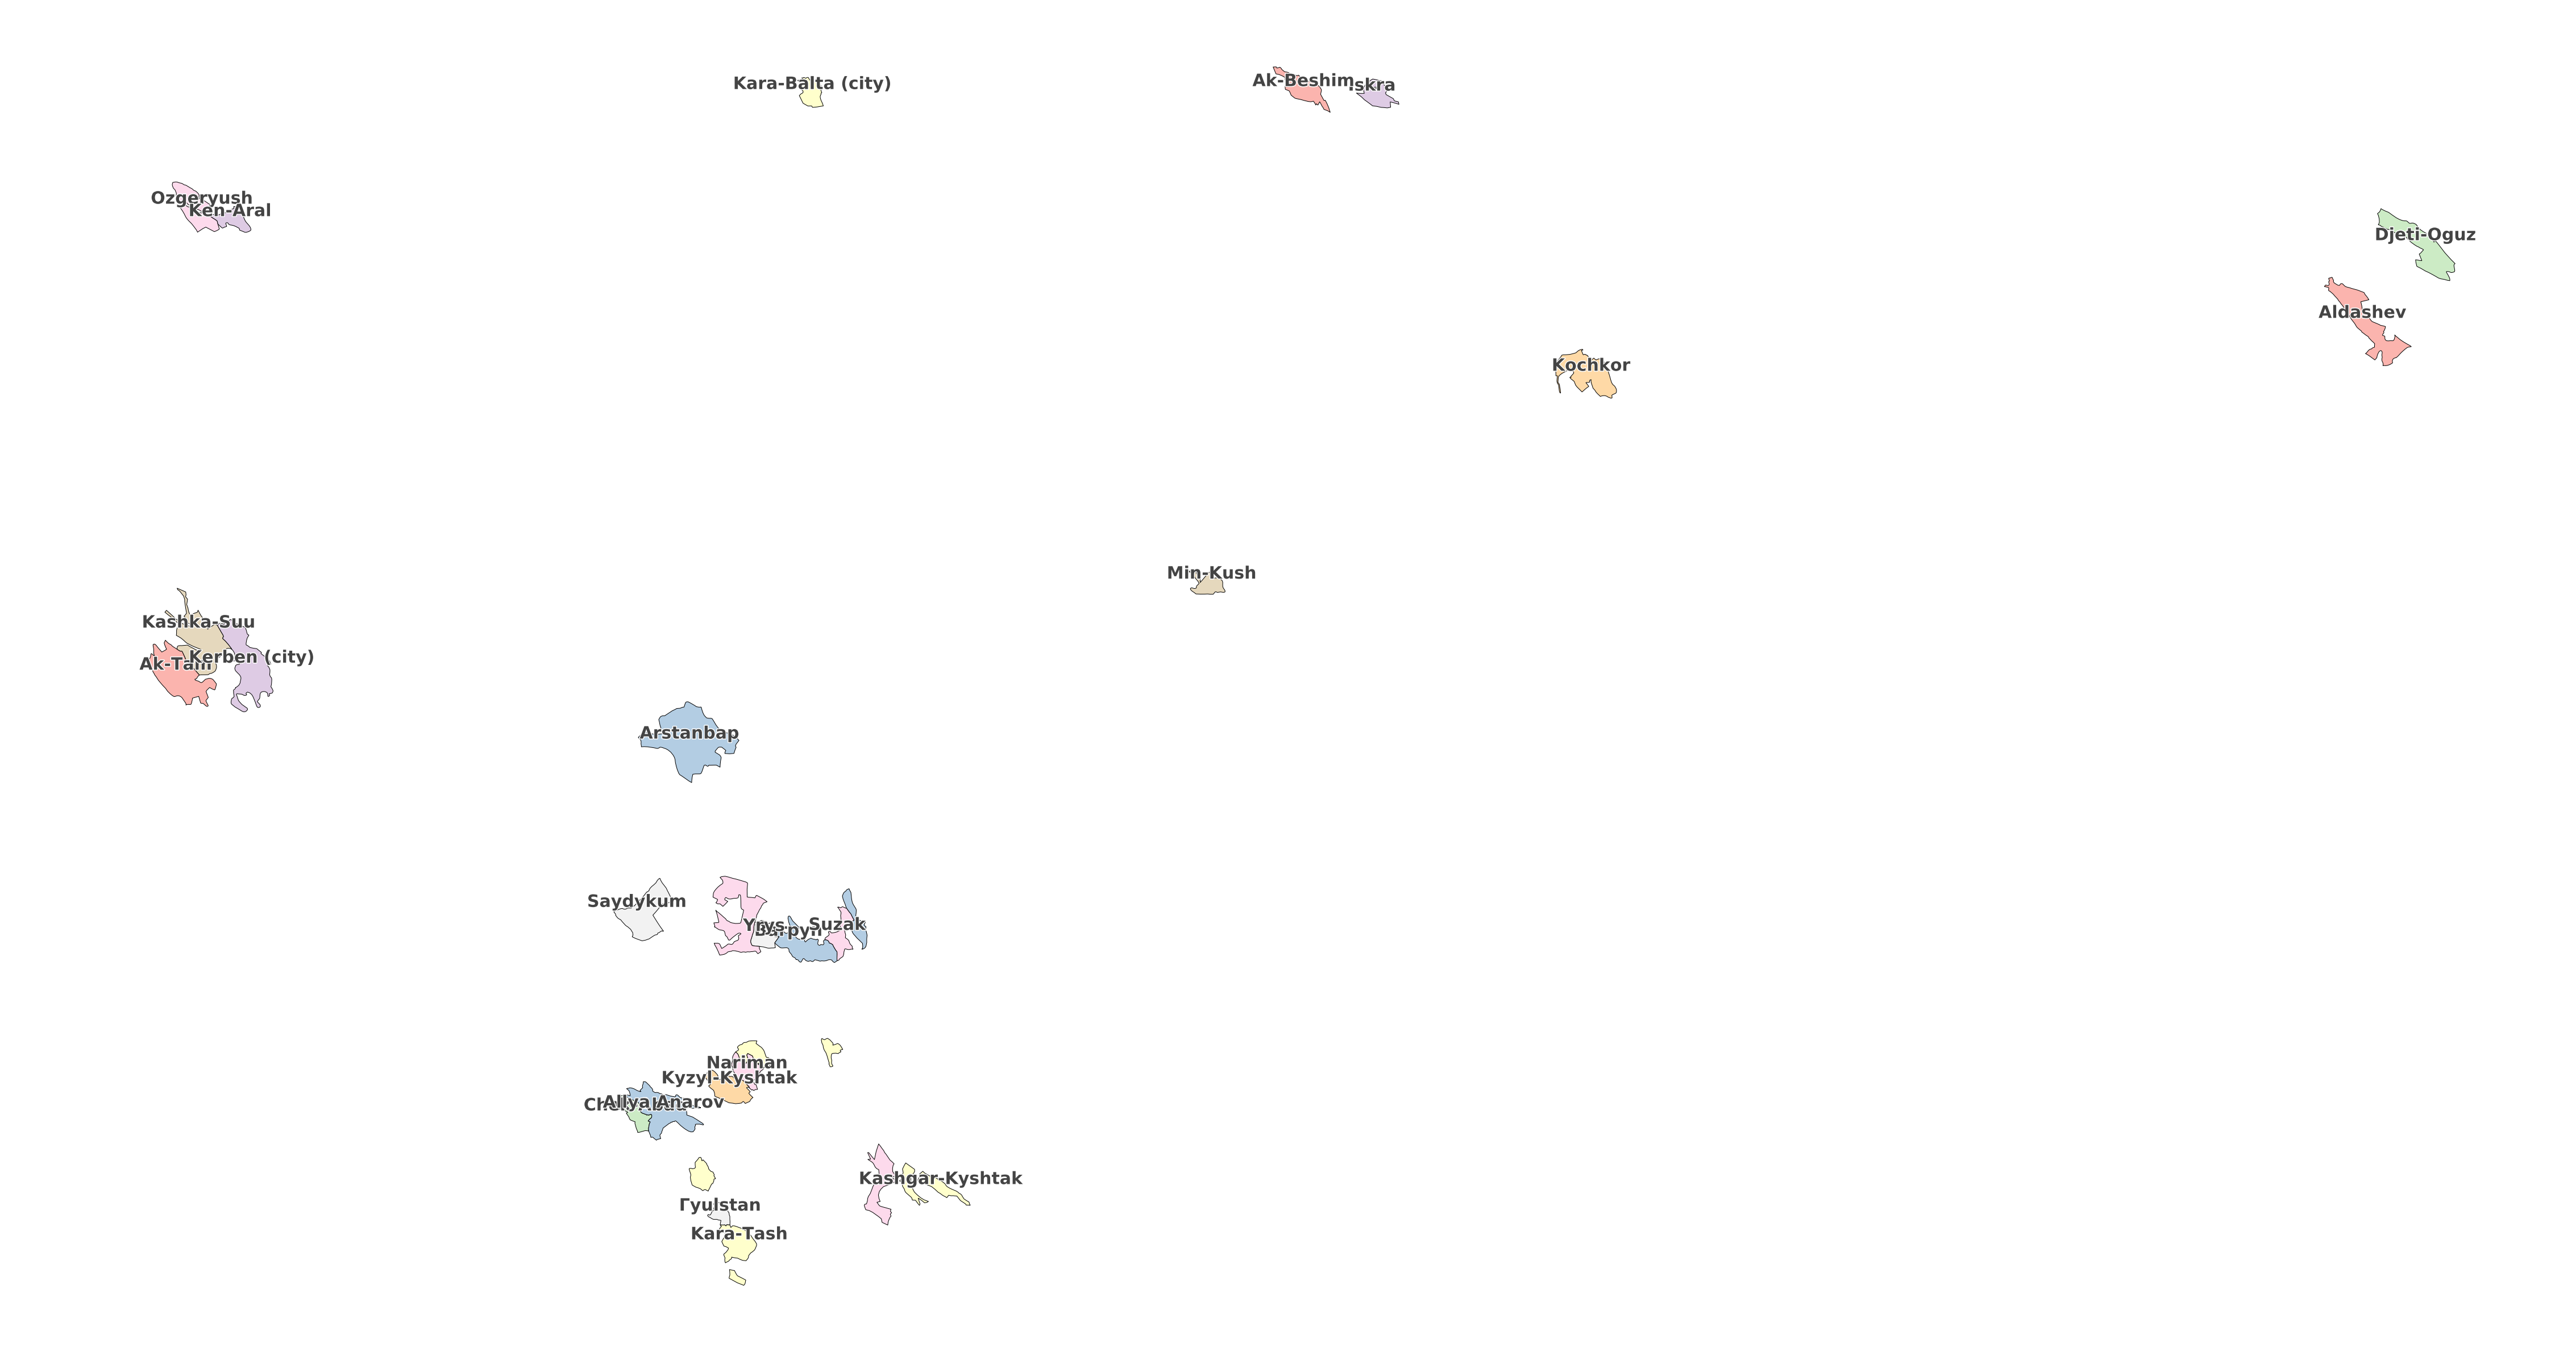

In [109]:
#plotting
# gpd.overlay(ax, ax1, how='intersection')

# ax1 = kg_admin_2.dropna().plot(column=kg_admin_2['Count of Project Sites'], cmap=cmap, vmin=0, vmax=2, figsize=figsize, k=colors, legend=False, edgecolor='black')
# ax1.set_axis_off()
# # ax1.get_legend().set_bbox_to_anchor((.9, .3))
# title = 'JashStan Project Sites in the Kyrgyz Republic'
# ax1.set_title(title, color='#444444', fontdict={'fontsize': 20}, loc='center')

ax = sites_df.dropna().plot(column=sites_df['ADM3_EN'], cmap='Pastel1', figsize=(80, 50), k=colors, legend=False, edgecolor='black')
ax.set_axis_off()
# ax.get_legend().set_bbox_to_anchor((.9, .3))
# title = 'Number of JashStan Project Sites per Oblast of the Kyrgyz Republic'
# ax.set_title(title, color='#444444', fontdict={'fontsize': 20}, loc='center')
for idx, row in sites_df.iterrows():
    label = row['ADM3_EN']
    txt = plt.annotate(s=label, xy=row['label_coords'],
             color='#444444', fontsize=30, weight='bold', ha='center', va='bottom')
    txt.set_path_effects([PathEffects.withStroke(linewidth=3, foreground='w')])
#         plt.annotate(s=row['Russian'], xy=row['coords'],
#                  color='red', horizontalalignment='left')


# plt.savefig('districts.png')

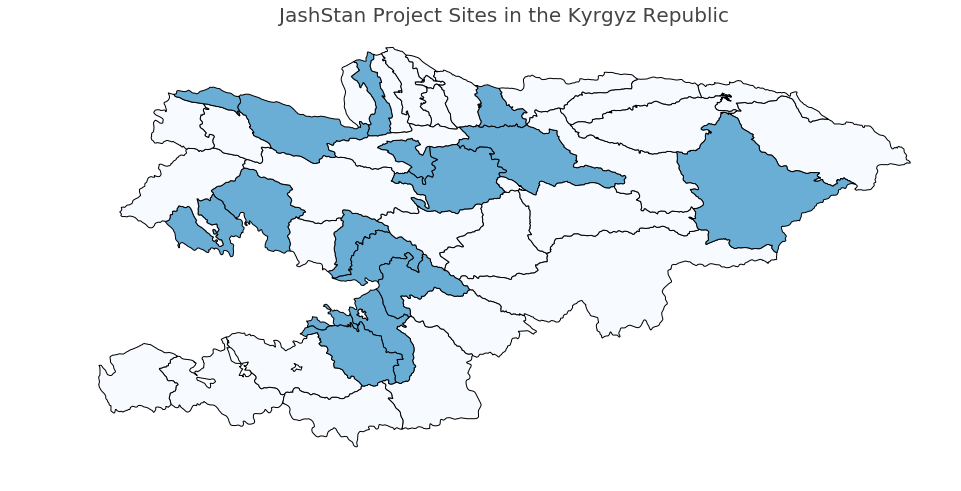

In [106]:


#plotting
ax = kg_admin_2.dropna().plot(column=kg_admin_2['Count of Project Sites'], cmap=cmap, vmin=0, vmax=2, figsize=figsize, k=colors, legend=False, edgecolor='black')
ax.set_axis_off()
# ax.get_legend().set_bbox_to_anchor((.9, .3))
title = 'JashStan Project Sites in the Kyrgyz Republic'
ax.set_title(title, color='#444444', fontdict={'fontsize': 20}, loc='center')
# for idx, row in kg_admin_2.iterrows():
#     if row['Count of Project Sites'] != 0:
#         label = f"{row['District']}: {row['Count of Project Sites']}"
#         txt = plt.annotate(s=label, xy=row['label_coords'],
#                  color='#444444', fontsize=12, weight='bold', ha='center', va='bottom')
#         txt.set_path_effects([PathEffects.withStroke(linewidth=5, foreground='w')])
    #         plt.annotate(s=row['Russian'], xy=row['coords'],
    #                  color='red', horizontalalignment='left')


plt.savefig('rayons.png')